- Author: Peter Riesebos
- Purpose: Script used to inspect summary stats from multiple studies and compare them, plotting correlations, heatmaps, and UpSet graphs.
- Input: List of protein coding genes, mbQTL format summary stat files
- Output: graphs

## Library and file imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from upsetplot import UpSet, plot
from scipy.stats import pearsonr

### New method mbqtl output (using a pre-protein coding filtered and version stripped expression matrix)

In [2]:
# pub rna mbQTL output (summary stats) before and after qvalue filter
pub_rna_new_qvalue = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/mbqtl_output_pub_rna_no_version/merged_topeffects_qvalue.txt", sep='\t')
pub_rna_new = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/mbqtl_output_pub_rna_no_version/merged_topeffects_final.txt", sep='\t')

In [3]:
# 1000IBD (Werna) mbQTL output (summary stats) before and after qvalue filter
werna_new_qvalue = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/output_no_ver/merged_topeffects_qvalue.txt", sep='\t')
werna_new = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/output_no_ver/merged_topeffects_final.txt", sep='\t')

In [4]:
# GTEx mbQTL output (summary stats) before and after qvalue filter
gtex_new_qvalue = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/mbqtl_output_gtex_no_version/merged_topeffects_qvalue.txt", sep='\t')
gtex_new = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/mbqtl_output_gtex_no_version/merged_topeffects_final.txt", sep='\t')

In [5]:
# combined datasets mbQTL output (summary stats) before and after qvalue filter
combined_new_qvalue = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined/mbqtl_output_combined_exp_fixed/merged_topeffects_qvalue.txt", sep='\t')
combined_new = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined/mbqtl_output_combined_exp_fixed/merged_topeffects_final.txt", sep='\t')

In [6]:
# combined datasets mbQTL output (summary stats) before and after qvalue filter (without pub_rna)
combined_no_pub_qvalue = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined_no_pub_rna/merged_topeffects_qvalue.txt", sep='\t')
combined_no_pub = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined_no_pub_rna/merged_topeffects_final.txt", sep='\t')

In [7]:
# combined datasets mbQTL output (summary stats) before and after qvalue filter (without 1000IBD)
combined_no_1000IBD_qvalue = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined_no_werna/merged_topeffects_qvalue.txt", sep='\t')
combined_no_1000IBD = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined_no_werna/merged_topeffects_final.txt", sep='\t')

### Top and All effect intersection files

In [2]:
werna_gtex = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/werna_gtex_overlap.txt', sep='\t')
gtex_werna = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/gtex_werna_overlap.txt', sep='\t')
pub_rna_werna = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/pub_rna_werna_overlap.txt', sep='\t')
werna_pub_rna = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/werna_pub_rna_overlap.txt', sep='\t')
pub_rna_gtex = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/pub_rna_gtex_overlap.txt', sep='\t')
gtex_pub_rna = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/intersect/gtex_pub_rna_overlap.txt', sep='\t')

### Old method mbqtl output files (filtering on protein coding genes after the mbQTL run, and no version numbering stripped)

In [2]:
# protein coding genes gencode v44
genes = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/final_files_pub_rna/protein_coding_genes_list.txt", names=["Gene"])
genes

,Gene
0,ENSG00000186092.7
1,ENSG00000284733.2
2,ENSG00000284662.2
3,ENSG00000187634.13
4,ENSG00000188976.11
...,...
20065,ENSG00000277836.1
20066,ENSG00000278633.1
20067,ENSG00000276017.1
20068,ENSG00000278817.1


In [3]:
# mbqtl pub_rna summary stats
pub_rna = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/final_files_pub_rna/pub_rna_100perm_30_cutoff_maf_0.05/merged_topEffects_final.txt", sep="\t")
pub_rna

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792.2,2,74918148,+,ENSG00000204792.2,rs12713826,2,75041011,T/A,A,...,-;-;0.744204;0.554869;0.764917;0.824807;0.8929...,-;-;6.694893;3.064522;6.798465;14.189217;17.11...,-;-;58;28;55;179;186;116;36,1130,0.00,0.802280,59.474285,3.045097e-119,0.000028,1.121408e-114
1,ENSG00000226752.10,9,120824828,+,ENSG00000226752.10,rs12684934,9,120830881,C/T,T,...,-;-0.656852;-0.840908;-0.525352;-0.743613;-;-0...,-;-4.285708;-8.259505;-2.87077;-6.503607;-;-16...,-;35;58;28;55;-;186;116;36,1016,0.00,1.102720,48.148537,2.816799e-113,0.000218,5.186666e-109
2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.00,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.00,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.00,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,ENSG00000228262.11,2,33706886,+,ENSG00000228262.11,rs1470611,2,33671049,C/A,A,...,-;-;-;-;-0.377367;-;-;-;-0.507666,-;-;-;-;-2.840179;-;-;-;-3.160536,-;-;-;-;55;-;-;-;36,755,0.00,0.750680,38.121667,6.234829e-03,0.000027,4.982812e-02
4608,ENSG00000110881.12,12,50057548,+,ENSG00000110881.12,rs386376466,12,50128488,C/CAAA,CAAA,...,-0.21666;-0.287802;-0.151555;-0.02799;0.086965...,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...,32;35;58;28;55;179;186;116;36,2512,0.00,0.822640,104.917207,6.248249e-03,0.000019,4.990659e-02
4609,ENSG00000117153.16,1,202891116,-,ENSG00000117153.16,rs7539542,1,202940846,G/C,C,...,-;-;0.30794;0.584245;-0.046837;-;0.240089;-;0....,-;-;2.351604;3.26448;-0.339558;-;3.30072;-;0.5...,-;-;58;28;55;-;186;-;36,1976,0.01,0.919379,181.941473,6.248713e-03,0.000021,4.990659e-02
4610,ENSG00000257431.1,12,82512677,+,ENSG00000257431.1,rs11358515,12,82432863,TA/T,T,...,-;-;-;-;-;-;-0.236501;-;-0.238909,-;-;-;-;-;-;-3.249935;-;-1.403279,-;-;-;-;-;-;186;-;36,201,0.00,0.870215,6.988307,6.246344e-03,0.000401,4.990659e-02


In [4]:
# mbqtl 1000IBD summary stats
werna = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/output/1000ibd_merged_topeffects_final.txt", sep="\t")
werna

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.1000IBD.,DatasetZScores.1000IBD.,DatasetSampleSizes.1000IBD.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000155957.19,12,66135846,-,ENSG00000155957.19,rs17767200,12,66143554,A/G,G,...,-0.828067,-15.573369,212,3617,0.0,0.929257,335.619701,1.657916e-48,2.442690e-06,7.190934e-44
1,ENSG00000254851.1,11,117135528,+,ENSG00000254851.1,rs236910,11,117211258,A/G,G,...,0.831346,15.690419,212,4662,0.0,0.816410,669.767333,4.300551e-43,4.373510e-07,9.326463e-39
2,ENSG00000277149.5,7,72558744,-,ENSG00000277149.5,rs6947199,7,72743715,A/G,G,...,-0.816480,-15.172103,212,3459,0.0,0.831267,233.065154,2.390197e-41,1.461780e-06,3.455694e-37
3,ENSG00000278266.1,12,127147149,+,ENSG00000278266.1,rs11058961,12,127060453,G/A,A,...,0.777615,13.945170,212,5606,0.0,0.979991,804.333083,1.769858e-40,1.502960e-06,1.919116e-36
4,ENSG00000171903.17,19,15912367,-,ENSG00000171903.17,rs12985091,19,15934939,G/A,A,...,-0.772235,-13.787412,212,6539,0.0,0.986046,584.458459,6.398493e-40,2.161000e-06,5.550480e-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,ENSG00000288784.1,7,144183466,+,ENSG00000288784.1,rs1277668795,7,143886866,ATT/A,A,...,0.335221,4.997380,212,3391,0.0,0.754600,244.023012,1.355350e-03,6.029380e-07,4.850336e-02
1212,ENSG00000163389.12,3,119468963,+,ENSG00000163389.12,rs1797839,3,119531024,T/C,C,...,-0.341862,-5.102727,212,4463,0.0,0.737063,342.555047,1.359827e-03,3.461010e-07,4.862344e-02
1213,ENSG00000184730.12,16,28494643,+,ENSG00000184730.12,rs181209,16,28503533,G/T,T,...,0.320967,4.772596,212,3307,0.0,0.850293,222.571658,1.377804e-03,1.843100e-06,4.922565e-02
1214,ENSG00000236981.1,11,124023013,+,ENSG00000236981.1,rs76000277,11,123126109,G/A,A,...,-0.322202,-4.792008,212,5987,0.0,0.976225,704.818060,1.379322e-03,1.668630e-06,4.923935e-02


In [5]:
# mbqtl 1000IBD summary stats
gtex = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/mbQTL_output/GTEx_colon_small_final.txt", sep="\t")
gtex

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetZScores.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetSampleSizes.GTEx_Colon_Transverse.GTEx_Small_Intestine.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792.2,2,74918148,+,ENSG00000204792.2,rs12366,2,74958729,G/T,T,...,0.880422;0.844401,23.196152;7.1151,363;43,3027,0.00,0.714788,362.741606,3.479480e-91,0.000018,1.069360e-87
1,ENSG00000270127.2,15,100547765,-,ENSG00000270127.2,rs36053285,15,100574435,T/C,C,...,-0.811839;-0.778316,-19.697398;-6.143089,363;43,4575,0.00,0.925538,883.963708,8.771240e-85,0.000025,1.347847e-81
2,ENSG00000236209.1,2,74919555,-,ENSG00000236209.1,rs12366,2,74958729,G/T,T,...,0.82331;0.826306,20.208727;6.823381,363;43,3026,0.00,0.845181,444.961475,3.652563e-83,0.000034,3.741848e-80
3,ENSG00000254614.2,11,65177606,-,ENSG00000254614.2,rs12800339,11,65179769,T/C,C,...,-0.804084;-0.863772,-19.364157;-7.456511,363;43,2042,0.00,0.825770,234.325716,5.112343e-77,0.000058,3.927983e-74
4,ENSG00000273295.1,22,23901432,-,ENSG00000273295.1,rs5751777,22,23924860,C/T,T,...,0.784523;0.830106,18.563044;6.882745,363;43,3771,0.00,0.908344,639.484255,1.066123e-76,0.000032,6.553105e-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,ENSG00000273172.1,17,183824,-,ENSG00000273172.1,17:201297:C:T,17,201297,C/T,T,...,0.197503;0.307728,3.787334;2.007452,363;43,2227,0.02,0.776804,431.301301,2.978838e-02,0.000023,4.940616e-02
1853,ENSG00000263232.2,16,72005037,-,ENSG00000263232.2,rs4556810,16,72999574,C/A,A,...,-0.196508;-0.311467,-3.767863;-2.033125,363;43,2158,0.04,0.650088,161.050193,2.990006e-02,0.000024,4.956464e-02
1854,ENSG00000167768.4,12,52674736,-,ENSG00000167768.4,rs1567759,12,52697782,C/A,A,...,0.18572;0.379869,3.557229;2.512535,363;43,3624,0.02,0.809875,421.178193,3.003728e-02,0.000029,4.976526e-02
1855,ENSG00000279187.1,17,81262920,+,ENSG00000279187.1,rs7224668,17,81261988,T/C,C,...,0.230089;-0.034816,4.428212;-0.22164,363;43,3984,0.04,0.938883,611.403624,3.014916e-02,0.000039,4.992372e-02


In [30]:
# mbqtl 1000IBD summary stats
all_studies = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined/combined_datasets_merged_final.txt", sep="\t")
all_studies

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.1000IBD.ERP113396.ERP114636.GTEx_Colon_Transverse.GTEx_Small_Intestine.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.1000IBD.ERP113396.ERP114636.GTEx_Colon_Transverse.GTEx_Small_Intestine.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.1000IBD.ERP113396.ERP114636.GTEx_Colon_Transverse.GTEx_Small_Intestine.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792,2,74918148,+,ENSG00000204792,rs12366,2,74958729,G/T,T,...,0.775618;-;-;0.880422;0.844401;0.742203;0.5267...,13.886314;-;-;23.196152;7.1151;6.667258;2.8799...,212;-;-;363;43;58;28;55;179;186;116;36,4124,0.00,0.829112,510.072277,1.167783e-259,0.000012,3.958785e-255
1,ENSG00000254851,11,117135528,+,ENSG00000254851,rs35186251,11,117205992,T/C,C,...,0.830863;0.680283;0.700251;0.714185;0.775487;0...,15.673072;4.283534;4.682681;16.038324;6.106354...,212;32;35;363;43;58;28;55;179;186;116;36,5115,0.00,0.940423,1122.160269,6.835783e-217,0.000010,1.158665e-212
2,ENSG00000164308,5,96875986,+,ENSG00000164308,rs35304156,5,96983311,CAT/C,C,...,0.798882;-;0.51394;0.845427;0.868714;0.749766;...,14.595929;-;3.158018;21.266603;7.549363;6.7724...,212;-;35;363;43;58;-;55;179;186;116;36,4450,0.00,0.774101,319.123002,2.584090e-214,0.000013,2.920022e-210
3,ENSG00000165171,7,73834590,-,ENSG00000165171,rs8629,7,73831189,T/C,C,...,-0.742649;-0.466703;-0.596777;-0.814443;-0.789...,-12.962524;-2.692676;-3.784019;-19.811481;-6.2...,212;32;35;363;43;58;28;55;179;186;116;36,2502,0.00,0.881083,459.435556,2.312385e-213,0.000018,1.959746e-209
4,ENSG00000214401,17,46193566,+,ENSG00000214401,rs169201,17,46712837,A/G,G,...,0.709041;0.703406;0.520276;0.716104;0.754089;-...,12.098996;4.490397;3.203756;16.101356;5.83829;...,212;32;35;363;43;-;-;55;179;186;116;36,6687,0.00,0.977479,329.307091,1.353968e-195,0.000042,9.179905e-192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,ENSG00000236493,10,92668745,-,ENSG00000236493,rs1338806625,10,92637032,CA/C,C,...,0.06438;-;-;0.225066;0.387544;-;-;-;-;-;-;-,0.932818;-;-;4.328959;2.567626;-;-;-;-;-;-;-,212;-;-;363;43;-;-;-;-;-;-;-,4683,0.02,0.686248,352.274975,1.532827e-02,0.000006,4.986838e-02
10420,ENSG00000133275,19,1941172,+,ENSG00000133275,19:1963042:G:GCCAGGCTCA,19,1963042,G/GCCAGGCTCAATGAGACACT,GCCAGGCTCAATGAGACACT,...,-0.1058;-0.067433;-0.272574;-0.292515;-0.05967...,-1.535682;-0.366702;-1.584167;-5.678628;-0.380...,212;32;35;363;43;58;28;55;179;186;116;36,5820,0.01,0.751604,1283.907044,1.533359e-02,0.000003,4.988089e-02
10421,ENSG00000273957,5,100388853,+,ENSG00000273957,rs276465,5,100770898,A/T,T,...,-0.205742;-;-;-;-;-0.054607;-;-0.012572;-;-0.1...,-3.010202;-;-;-;-;-0.407123;-;-0.091098;-;-2.6...,212;-;-;-;-;58;-;55;-;186;-;-,1365,0.01,0.793753,20.551058,1.534182e-02,0.000232,4.990288e-02
10422,ENSG00000267472,17,68198921,+,ENSG00000267472,rs8067476,17,68216846,T/C,C,...,0.101095;-;-;0.142688;0.148103;-;-;0.130077;-;...,1.467023;-;-;2.723144;0.947801;-;-;0.946552;-;...,212;-;-;363;43;-;-;55;-;186;-;36,4770,0.00,0.706202,566.681982,1.535437e-02,0.000004,4.993891e-02


Before filtering we find:
- 1857 eGenes in GTEx (406 samples)
- 1216 eGenes in 1000IBD (227 samples)
- 4612 eGenes in pub rna (724 samples)

## Data inspection

In [8]:
pub_rna_new.sort_values(by="GeneChr")

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
3253,ENSG00000184389,1,33306766,-,ENSG00000184389,rs11802938,1,33250553,G/A,A,...,-;-;-;-;0.065769;-;0.30112;-;-,-;-;-;-;0.47707;-;4.176388;-;-,-;-;-;-;55;-;186;-;-,1131,0.02,0.800764,42.879747,1.330778e-02,0.000129,4.206905e-02
3263,ENSG00000162783,1,181088700,+,ENSG00000162783,rs3842829,1,180158613,C/T,T,...,-;0.152051;0.244724;-0.03386;0.188055;-;0.1840...,-;0.871961;1.851452;-0.17105;1.374919;-;2.5152...,-;35;58;28;55;-;186;116;36,801,0.00,0.860352,54.563267,1.354269e-02,0.000148,4.268049e-02
1381,ENSG00000264343,1,146146203,-,ENSG00000264343,rs1259144030,1,146028748,CT/C,C,...,-;-;-;-0.151081;0.051073;-0.137497;-0.376399;-...,-;-;-;-0.767416;0.37031;-1.835425;-5.294809;-1...,-;-;-;28;55;179;186;116;36,627,0.00,0.861136,22.453325,3.200497e-05,0.000363,2.382232e-04
1202,ENSG00000188295,1,247099962,-,ENSG00000188295,rs6702419,1,247087833,C/T,T,...,-;-;-;-;0.175091;-;0.372188;-;0.347034,-;-;-;-;1.278585;-;5.230897;-;2.073658,-;-;-;-;55;-;186;-;36,1331,0.00,0.893526,76.287155,6.903322e-06,0.000129,5.902924e-05
1210,ENSG00000186510,1,16018875,+,ENSG00000186510,rs761759,1,16015855,A/T,T,...,-;-;0.154376;0.189981;0.110673;-;0.36255;-;0.1...,-;-;1.157052;0.968309;0.804394;-;5.085272;-;1....,-;-;58;28;55;-;186;-;36,2804,0.00,1.301943,271.370358,7.510751e-06,0.000182,6.379900e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,ENSG00000100253,22,50486784,+,ENSG00000100253,rs2076713,22,50456420,G/A,A,...,-;-;0.062446;-;-;0.228824;0.303658;0.083394;-,-;-;0.465673;-;-;3.080998;4.213341;0.890001;-,-;-;58;-;-;179;186;116;-,2294,0.00,0.899707,346.983777,1.129211e-03,0.000029,5.466269e-03
2073,ENSG00000242247,22,42796502,-,ENSG00000242247,rs71186543,22,42824031,C/CTT,CTT,...,0.337175;0.146985;0.064729;0.503173;0.18605;0....,1.887151;0.842584;0.482733;2.729346;1.359996;2...,32;35;58;28;55;179;186;116;36,2925,0.00,0.731738,157.455946,9.621005e-04,0.000021,4.771845e-03
3316,ENSG00000100030,22,21759657,-,ENSG00000100030,rs13055161,22,22376778,G/A,A,...,-;-;0.369664;-;0.075929;0.209955;0.141705;-;-,-;-;2.855913;-;0.550964;2.82084;1.929318;-;-,-;-;58;-;55;179;186;-;-,2184,0.01,0.887892,205.105314,1.439997e-02,0.000046,4.465714e-02
3408,ENSG00000183762,22,29073035,+,ENSG00000183762,rs11704960,22,28993214,A/T,T,...,-;-;-;-;-0.158884;-;-0.271052;-;-0.207173,-;-;-;-;-1.158627;-;-3.742034;-;-1.212378,-;-;-;-;55;-;186;-;36,1831,0.01,0.873661,147.599857,1.638619e-02,0.000059,4.942258e-02


In [9]:
gtex_pub_rna.sort_values(by="GeneChr")

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,MetaBeta,MetaSE,MetaI2,NrDatasets,DatasetCorrelationCoefficients(ERP113396;ERP114636;SRP063496;SRP068609;SRP077046;SRP096757;SRP129004;SRP155976;SRP189239),DatasetZScores(ERP113396;ERP114636;SRP063496;SRP068609;SRP077046;SRP096757;SRP129004;SRP155976;SRP189239),DatasetSampleSizes(ERP113396;ERP114636;SRP063496;SRP068609;SRP077046;SRP096757;SRP129004;SRP155976;SRP189239),UniqueID,Flipped,MetaPZ
4231,ENSG00000143001,1,54980628.0,+,ENSG00000143001,rs2433673,1.0,54977932,C/G,G,...,-0.532316,0.094735,0.160818,3.0,-;-;-;-;-0.160227;-;-0.381546;-;-0.324156,-;-;-;-;-1.16855;-;-5.373173;-;-1.928735,-;-;-;-;55;-;186;-;36,ENSG00000143001:1:54977932:C/G,False,-5.751709
4232,ENSG00000187642,1,975198.0,-,ENSG00000187642,rs28477686,1.0,975014,C/T,T,...,-0.122683,0.090031,0.000000,3.0,-;-;-;-;-0.1428;-;-0.040464;-;-0.213112,-;-;-;-;-1.040051;-;-0.548363;-;-1.24794,-;-;-;-;55;-;186;-;36,ENSG00000187642:1:975014:C/T,False,-7.059029
4233,ENSG00000228594,1,1598012.0,-,ENSG00000228594,rs28401288,1.0,1639348,G/T,T,...,0.092167,0.071795,0.457737,6.0,-;-;0.13914;-0.082976;0.050909;0.125532;0.0722...,-;-;1.041667;-0.419777;0.369116;1.674368;0.980...,-;-;58;28;55;179;186;-;36,ENSG00000228594:1:1639348:G/T,False,4.319687
4234,ENSG00000158825,1,20589086.0,+,ENSG00000158825,rs532545,1.0,20588679,C/T,T,...,0.448361,0.054147,0.663758,8.0,0.027695;-;0.238099;-0.042748;0.191701;0.38718...,0.150464;-;1.799814;-0.215984;1.402078;5.35424...,32;-;58;28;55;179;186;116;36,ENSG00000158825:1:20588679:C/T,False,7.593591
4235,ENSG00000043514,1,39838110.0,-,ENSG00000043514,rs11589146,1.0,39829736,G/A,A,...,0.247070,0.079318,0.361098,5.0,0.303242;-;0.140313;-;0.219673;-;0.203242;-;-0...,1.687134;-;1.050538;-;1.611468;-;2.782265;-;-1...,32;-;58;-;55;-;186;-;36,ENSG00000043514:1:39829736:G/A,False,8.415155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,ENSG00000100228,22,23145366.0,+,ENSG00000100228,rs6003525,22.0,23154358,T/C,C,...,-0.134347,0.105660,0.000000,2.0,-;-;-;-;-;-;-0.083458;-;-0.100509,-;-;-;-;-;-;-1.132516;-;-0.58325,-;-;-;-;-;-;186;-;36,ENSG00000100228:22:23154358:T/C,False,5.354383
1035,ENSG00000183307,22,17116297.0,-,ENSG00000183307,rs751935295,22.0,17130697,T/TTTTCTTTC,TTTTCTTTC,...,-0.223177,0.079077,0.000000,4.0,-;-;-0.178697;-;-0.197369;-;-0.094508;-;-0.367343,-;-;-1.34212;-;-1.444359;-;-1.283098;-;-2.203972,-;-;58;-;55;-;186;-;36,ENSG00000183307:22:17130697:T/TTTTCTTTC,False,-4.451604
1036,ENSG00000239282,22,30285117.0,-,ENSG00000239282,rs5749082,22.0,30374614,T/A,A,...,-0.002280,0.099215,0.156472,3.0,-;-;-;-;-0.182712;-;0.030531;-;0.111309,-;-;-;-;-1.335178;-;0.413672;-;0.646296,-;-;-;-;55;-;186;-;36,ENSG00000239282:22:30374614:T/A,False,-5.695962
1037,ENSG00000100336,22,36189124.0,-,ENSG00000100336,rs132717,22.0,36200606,C/T,T,...,-0.238344,0.076671,0.000000,4.0,-;-;-0.15773;-;-0.114751;-;-0.201139;-;-0.119391,-;-;-1.182504;-;-0.834228;-;-2.752873;-;-0.69355,-;-;58;-;55;-;186;-;36,ENSG00000100336:22:36200606:C/T,False,-10.907252


### Remaining eGenes after filtering on protein coding genes (old, no longer used)

In [7]:
intersect_pub_rna = set(pub_rna["Gene"]) & set(genes["Gene"])
print(len(intersect_pub_rna))

2820


In [8]:
intersect_werna = set(werna["Gene"]) & set(genes["Gene"])
print(len(intersect_werna))

737


In [9]:
intersect_gtex = set(gtex["Gene"]) & set(genes["Gene"])
print(len(intersect_gtex))

150


After filtering on protein coding genes we find:
- 150 eGenes in GTEx (406 samples)
- 737 eGenes in 1000IBD (227 samples)
- 2820 eGenes in pub rna (724 samples)

## Dataset cleanup and preparations

In [14]:
filtered_mbqtl = pub_rna_new.copy()
filtered_mbqtl

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000258289,14,64914361,+,ENSG00000258289,rs11158569,14,64933351,C/T,T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1677,0.00,0.835944,111.704155,6.165525e-110,0.000062,6.342270e-106
1,ENSG00000121716,7,100352176,+,ENSG00000121716,rs7792525,7,100374499,A/G,G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2764,0.00,0.901574,239.778737,1.317501e-106,0.000043,6.776349e-103
2,ENSG00000196862,2,107826892,+,ENSG00000196862,rs11123707,2,108566901,G/A,A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,963,0.00,0.906515,19.489434,6.792753e-102,0.000541,2.329160e-98
3,ENSG00000164308,5,96875986,+,ENSG00000164308,rs35304156,5,96983311,CAT/C,C,...,-;0.51394;0.749766;-;0.822442;0.725984;0.87741...,-;3.158018;6.772461;-;7.699995;11.497036;16.42...,-;35;58;-;55;179;186;116;36,1671,0.00,0.781309,76.946810,7.958886e-96,0.000063,2.046760e-92
4,ENSG00000165171,7,73834590,-,ENSG00000165171,rs11284359,7,73832811,TA/T,T,...,-0.467706;-0.595068;-0.619319;-0.751967;-0.732...,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...,32;35;58;28;55;179;186;116;36,1057,0.00,0.833217,86.466338,1.020071e-95,0.000079,2.098626e-92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,ENSG00000242950,7,92468380,-,ENSG00000242950,rs2190507,7,92545231,T/C,C,...,-;-;-;-;0.42919;-;0.198407;-;-,-;-;-;-;3.269671;-;2.714718;-;-,-;-;-;-;55;-;186;-;-,1397,0.01,0.749540,47.708309,1.656321e-02,0.000080,4.986253e-02
3417,ENSG00000145020,3,49416778,-,ENSG00000145020,rs10575617,3,49773980,AAC/A,A,...,0.078873;0.249809;0.246759;-;0.236724;0.090614...,0.429091;1.447278;1.867344;-;1.740097;1.206326...,32;35;58;-;55;179;186;116;36,2288,0.00,0.783362,90.378810,1.657843e-02,0.000054,4.989373e-02
3418,ENSG00000100285,22,29480218,+,ENSG00000100285,rs2857629,22,29700885,G/T,T,...,-;-;-;-;0.317537;-;0.248216;-;0.15273,-;-;-;-;2.362325;-;3.41601;-;0.889271,-;-;-;-;55;-;186;-;36,2420,0.03,0.773046,149.813972,1.659231e-02,0.000030,4.992089e-02
3419,ENSG00000165097,6,18155329,+,ENSG00000165097,rs13199975,6,18167848,G/A,A,...,-;-;-;-0.10377;-0.048385;-;-0.182847;-0.332042...,-;-;-;-0.525487;-0.350796;-;-2.497987;-3.64134...,-;-;-;28;55;-;186;116;36,1545,0.01,0.903580,134.166157,1.660924e-02,0.000077,4.995721e-02


In [15]:
# ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239
filtered_mbqtl.columns = ['Gene', 'GeneChr', 'GenePos', 'GeneStrand', 'GeneSymbol', 'SNP',
       'SNPChr', 'SNPPos', 'SNPAlleles', 'SNPEffectAllele',
       'SNPEffectAlleleFreq', 'QTLType', 'MetaP', 'MetaPN', 'MetaPZ',
       'MetaBeta', 'MetaSE', 'MetaI2', 'NrDatasets',
       'DatasetCorrelationCoefficients',
       'DatasetZScores',
       'DatasetSampleSizes',
       'NrTestedSNPs', 'ProportionBetterPermPvals', 'BetaDistAlpha',
       'BetaDistBeta', 'BetaAdjustedMetaP', 'PvalueNominalThreshold', 'qval']
filtered_mbqtl = filtered_mbqtl.reset_index()
filtered_mbqtl.head(5)

,index,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,...,DatasetCorrelationCoefficients,DatasetZScores,DatasetSampleSizes,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,0,ENSG00000258289,14,64914361,+,ENSG00000258289,rs11158569,14,64933351,C/T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1677,0.0,0.835944,111.704155,6.165525e-110,0.000062,6.342270e-106
1,1,ENSG00000121716,7,100352176,+,ENSG00000121716,rs7792525,7,100374499,A/G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2764,0.0,0.901574,239.778737,1.317501e-106,0.000043,6.776349e-103
2,2,ENSG00000196862,2,107826892,+,ENSG00000196862,rs11123707,2,108566901,G/A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,963,0.0,0.906515,19.489434,6.792753e-102,0.000541,2.329160e-98
3,3,ENSG00000164308,5,96875986,+,ENSG00000164308,rs35304156,5,96983311,CAT/C,...,-;0.51394;0.749766;-;0.822442;0.725984;0.87741...,-;3.158018;6.772461;-;7.699995;11.497036;16.42...,-;35;58;-;55;179;186;116;36,1671,0.0,0.781309,76.946810,7.958886e-96,0.000063,2.046760e-92
4,4,ENSG00000165171,7,73834590,-,ENSG00000165171,rs11284359,7,73832811,TA/T,...,-0.467706;-0.595068;-0.619319;-0.751967;-0.732...,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...,32;35;58;28;55;179;186;116;36,1057,0.0,0.833217,86.466338,1.020071e-95,0.000079,2.098626e-92


In [21]:
dataframes = [werna_gtex, gtex_werna, pub_rna_werna, werna_pub_rna, pub_rna_gtex, gtex_pub_rna]

# Iterate over each dataframe and flip the MetaPZ values where Flipped is True
for df in dataframes:
    # Flip MetaPZ values where Flipped column is True
    df.loc[df['Flipped'] == True, 'MetaPZ'] *= -1

## Plotting

### UpSet plots

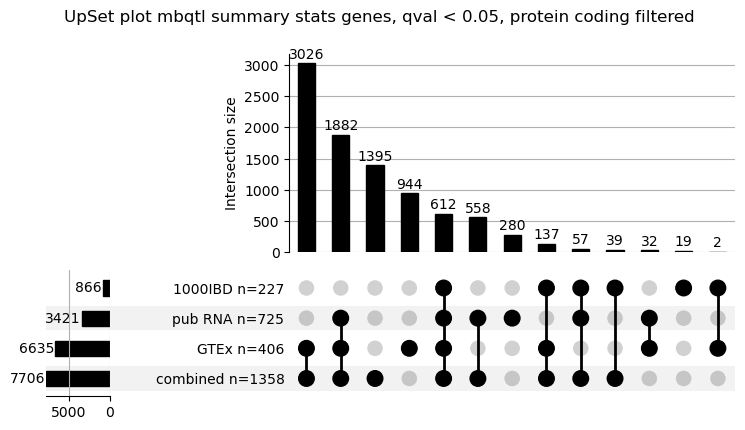

In [16]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub_rna_new["Gene"])
set2 = set(werna_new["Gene"])
set3 = set(gtex_new["Gene"])
set4 = set(combined_new["Gene"])

set_names = ['pub RNA n=725', '1000IBD n=227', 'GTEx n=406', 'combined n=1358']
all_elems = set1.union(set2).union(set3).union(set4)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05, protein coding filtered")
plt.show()

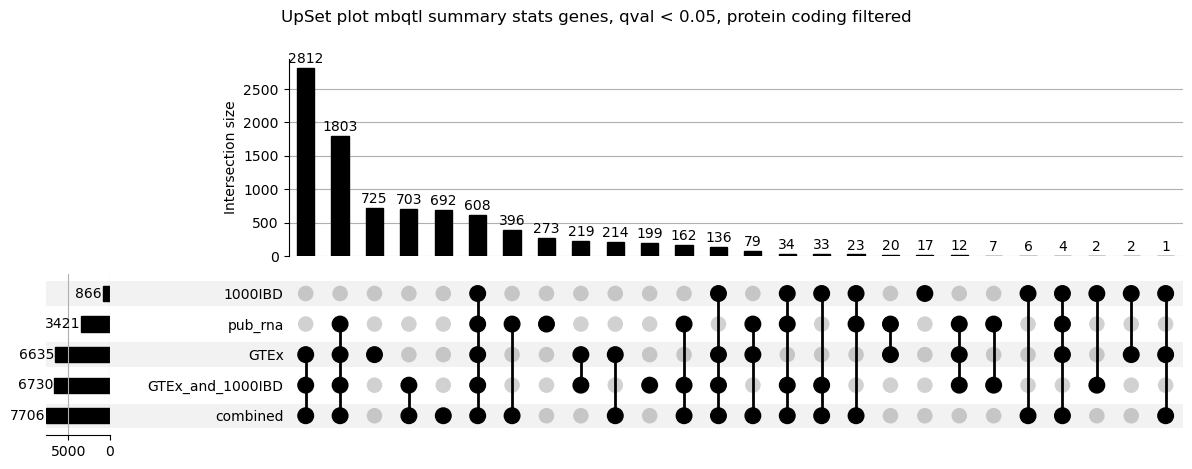

In [13]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub_rna_new["Gene"])
set2 = set(werna_new["Gene"])
set3 = set(gtex_new["Gene"])
set4 = set(combined_new["Gene"])
set5 = set(combined_no_pub["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx', 'combined', 'GTEx_and_1000IBD']
all_elems = set1.union(set2).union(set3).union(set4).union(set5)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4, e in set5] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05, protein coding filtered")
plt.show()

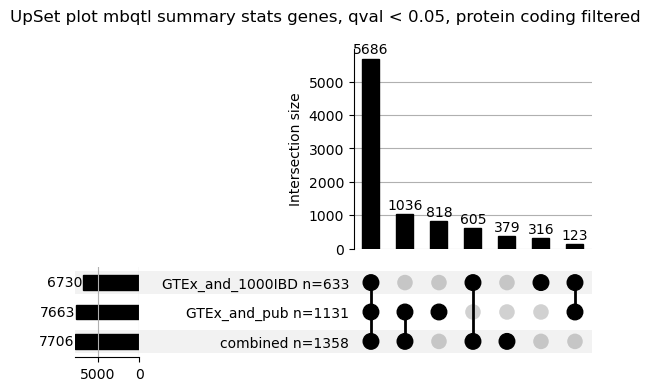

In [17]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(combined_new["Gene"])
set2 = set(combined_no_pub["Gene"])
set3 = set(combined_no_1000IBD["Gene"])

set_names = ['combined n=1358', 'GTEx_and_1000IBD n=633', 'GTEx_and_pub n=1131']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05, protein coding filtered")
plt.show()

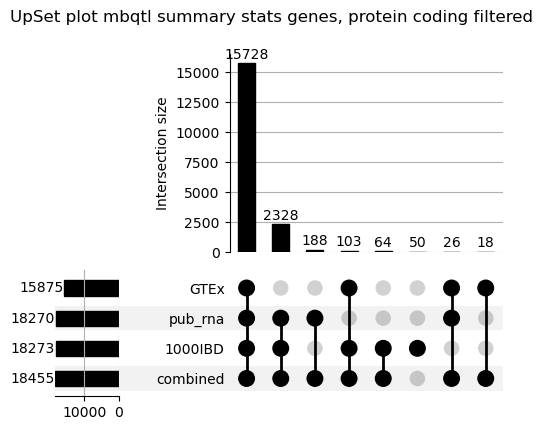

In [15]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub_rna_new_qvalue["Gene"])
set2 = set(werna_new_qvalue["Gene"])
set3 = set(gtex_new_qvalue["Gene"])
set4 = set(combined_new_qvalue["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx', 'combined']
all_elems = set1.union(set2).union(set3).union(set4)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, protein coding filtered")
plt.show()

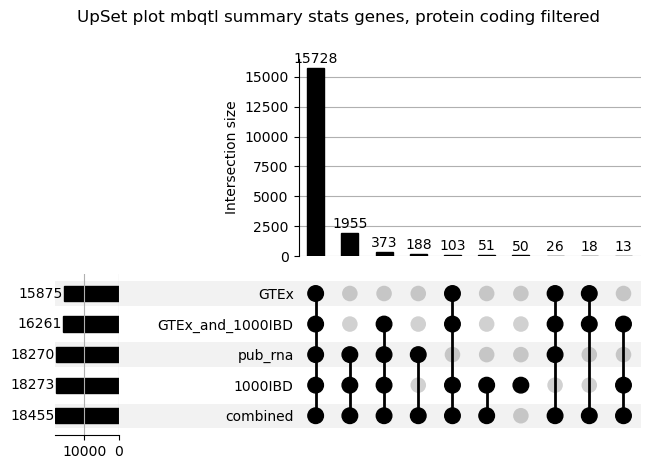

In [13]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub_rna_new_qvalue["Gene"])
set2 = set(werna_new_qvalue["Gene"])
set3 = set(gtex_new_qvalue["Gene"])
set4 = set(combined_new_qvalue["Gene"])
set5 = set(combined_no_pub_qvalue["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx', 'combined', 'GTEx_and_1000IBD']
all_elems = set1.union(set2).union(set3).union(set4).union(set5)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4, e in set5] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, protein coding filtered")
plt.show()

### Old upset plots

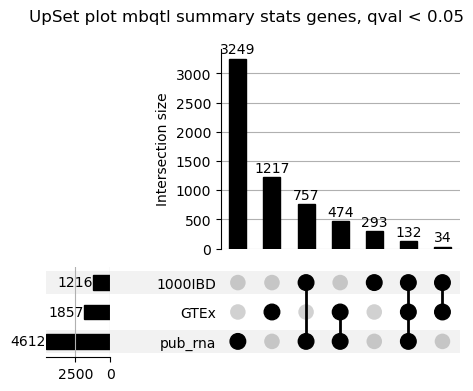

In [23]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub_rna["Gene"])
set2 = set(werna["Gene"])
set3 = set(gtex["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05")
plt.show()

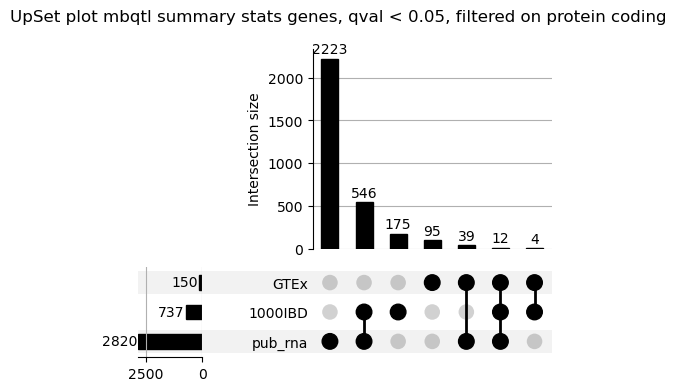

In [24]:
# upset plot of all datasets (gtex, werna, pub) filtered on protein coding genes

set1 = set(pub_rna["Gene"]) & set(genes["Gene"])
set2 = set(werna["Gene"]) & set(genes["Gene"])
set3 = set(gtex["Gene"]) & set(genes["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05, filtered on protein coding")
plt.show()

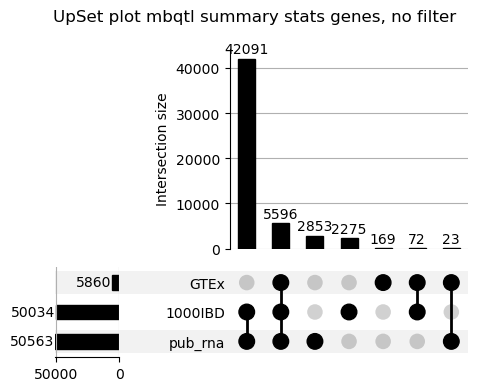

In [25]:
# upset plot of all datasets (gtex, werna, pub) before the qvalue filter
set1 = set(all_topeffects_pub_rna["Gene"])
set2 = set(all_topeffects_werna["Gene"])
set3 = set(all_topeffects_gtex["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, no filter")
plt.show()

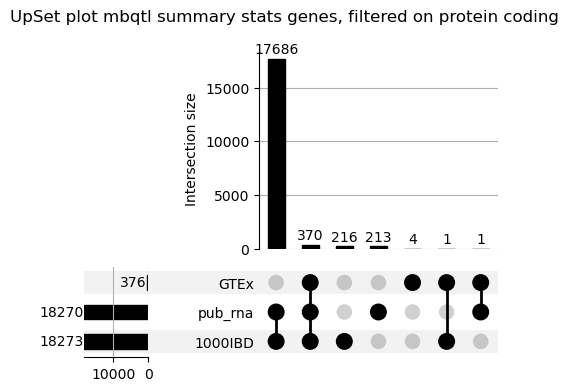

In [26]:
# upset plot of all datasets (gtex, werna, pub) before the qvalue filter
set1 = set(all_topeffects_pub_rna["Gene"]) & set(genes["Gene"])
set2 = set(all_topeffects_werna["Gene"]) & set(genes["Gene"])
set3 = set(all_topeffects_gtex["Gene"]) & set(genes["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, filtered on protein coding")
plt.show()

### Top All effects intersection scatter plots

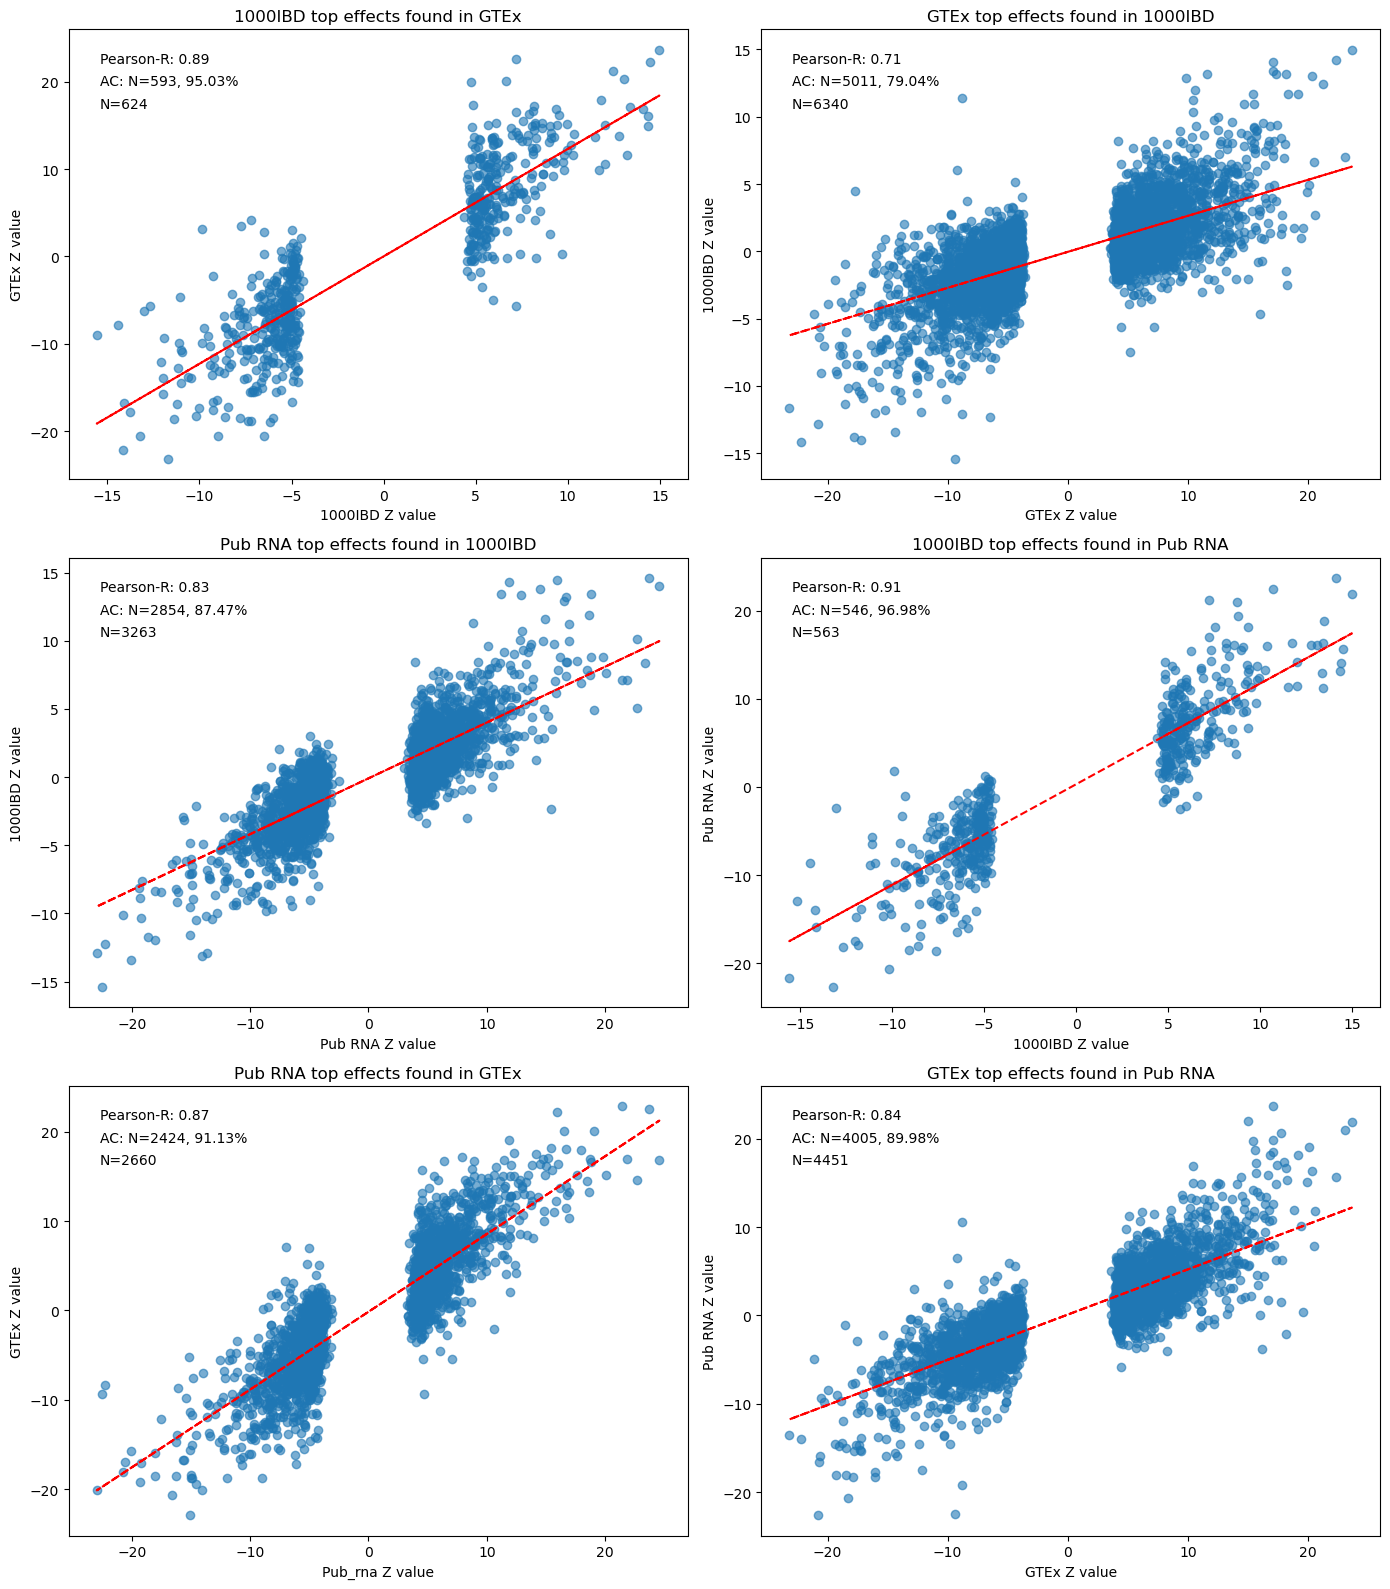

In [22]:
dataframes = [
    ('1000IBD top effects found in GTEx', werna_gtex, '1000IBD Z value', 'GTEx Z value'),
    ('GTEx top effects found in 1000IBD', gtex_werna, 'GTEx Z value', '1000IBD Z value'),
    ('Pub RNA top effects found in 1000IBD', pub_rna_werna, 'Pub RNA Z value', '1000IBD Z value'),
    ('1000IBD top effects found in Pub RNA', werna_pub_rna, '1000IBD Z value', 'Pub RNA Z value'),
    ('Pub RNA top effects found in GTEx', pub_rna_gtex, 'Pub_rna Z value', 'GTEx Z value'),
    ('GTEx top effects found in Pub RNA', gtex_pub_rna, 'GTEx Z value', 'Pub RNA Z value')
]

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

# Function to calculate Allelic Concordance
def calculate_allelic_concordance(x, y):
    # Remove NaN values
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx]
    y_valid = y[valid_idx]

    # Get the count of values that share the same direction
    same_direction_count = np.sum(np.sign(x_valid) == np.sign(y_valid))
    total_valid_points = len(x_valid)
    same_direction_percentage = (same_direction_count / total_valid_points * 100) if total_valid_points > 0 else 0
    
    return same_direction_count, same_direction_percentage, total_valid_points

# Plot MetaPZ vs MetaPZ_chrom for each dataframe and add trendlines
for i, (name, df, xlabel, ylabel) in enumerate(dataframes):
    x = df['MetaPZ']
    y = df['MetaPZ_chrom']
    
    # Scatter plot
    axes[i].scatter(x, y, alpha=0.6)
    
    # Add trendline
    z = np.polyfit(x, y, 1)  # Fit linear regression (1st-degree polynomial)
    p = np.poly1d(z)
    axes[i].plot(x, p(x), "r--")  # Plot the trendline in red dashed style
    
    # Calculate Pearson's r and Allelic Concordance
    pearson_r, _ = pearsonr(x.dropna(), y.dropna())
    ac_count, ac_percentage, n = calculate_allelic_concordance(x, y)

    # Labels and titles
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel(xlabel)  # Set x-axis label dynamically
    axes[i].set_ylabel(ylabel)  # Set y-axis label dynamically
    
    # Display Pearson-R, AC, and N on the plot
    axes[i].text(0.05, 0.95, f'Pearson-R: {pearson_r:.2f}', ha='left', va='top', transform=axes[i].transAxes)
    axes[i].text(0.05, 0.90, f'AC: N={ac_count}, {ac_percentage:.2f}%', ha='left', va='top', transform=axes[i].transAxes)
    axes[i].text(0.05, 0.85, f'N={n}', ha='left', va='top', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()


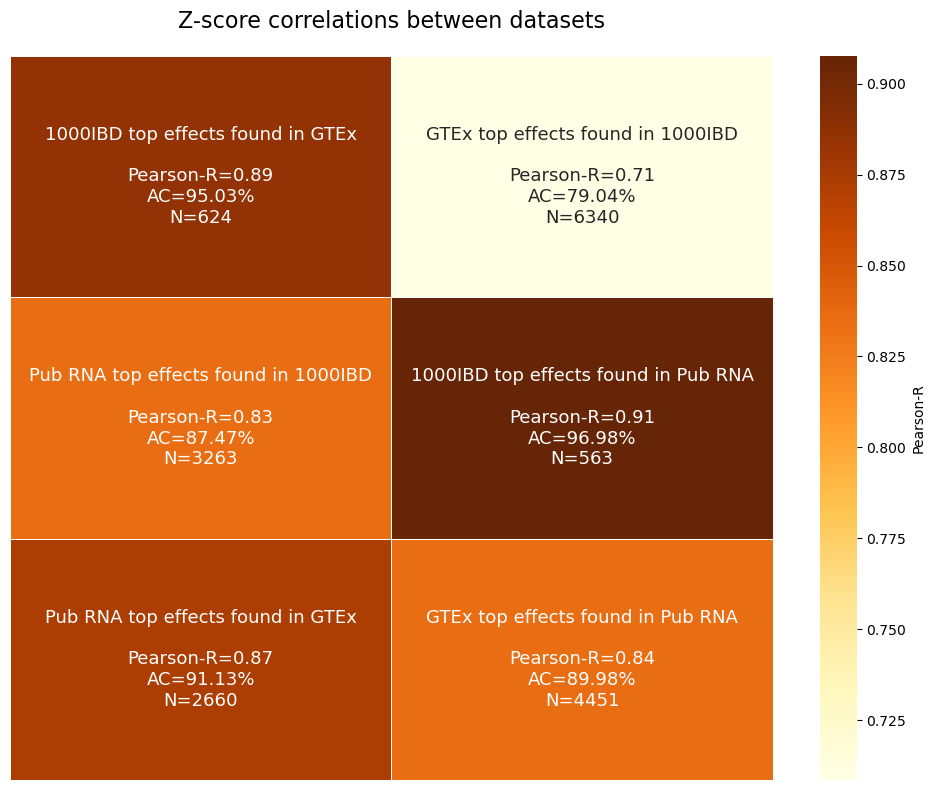

In [23]:
# Initialize matrices to store the statistics for a 3x2 layout
pearson_r_matrix = np.zeros((3, 2))
ac_percentage_matrix = np.zeros((3, 2))
n_matrix = np.zeros((3, 2))

# Titles for each heatmap cell
titles_matrix = np.empty((3, 2), dtype=object)

# Function to calculate Allelic Concordance
def calculate_allelic_concordance(x, y):
    # Remove NaN values
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx]
    y_valid = y[valid_idx]

    # Get the count of values that share the same direction
    same_direction_count = np.sum(np.sign(x_valid) == np.sign(y_valid))
    total_valid_points = len(x_valid)
    same_direction_percentage = (same_direction_count / total_valid_points * 100) if total_valid_points > 0 else 0
    
    return same_direction_count, same_direction_percentage, total_valid_points

# Iterate over dataframes and calculate the statistics
for i, (name, df, xlabel, ylabel) in enumerate(dataframes):
    x = df['MetaPZ']
    y = df['MetaPZ_chrom']

    # Calculate Pearson's r and Allelic Concordance
    pearson_r, _ = pearsonr(x.dropna(), y.dropna())
    ac_count, ac_percentage, n = calculate_allelic_concordance(x, y)
    
    # Update matrices
    row = i // 2
    col = i % 2
    pearson_r_matrix[row, col] = pearson_r
    ac_percentage_matrix[row, col] = ac_percentage
    n_matrix[row, col] = n
    titles_matrix[row, col] = name  # Store the titles in the titles matrix

# Create annotations to include the title, Pearson-R, AC, and N for each cell
annotations = np.empty(pearson_r_matrix.shape, dtype=object)
for i in range(3):
    for j in range(2):
        title = titles_matrix[i, j]
        pearson_r_value = pearson_r_matrix[i, j]
        ac_value = ac_percentage_matrix[i, j]
        n_value = n_matrix[i, j]
        # Combine the title and other statistics in the annotation
        annotations[i, j] = f'{title}\n\nPearson-R={pearson_r_value:.2f}\nAC={ac_value:.2f}%\nN={int(n_value)}'

# Set up the heatmap with 3x2 layout, remove xticks and yticks, and increase font size
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_r_matrix, annot=annotations, fmt='', cmap='YlOrBr', cbar_kws={'label': 'Pearson-R'},
            annot_kws={"size": 13},  # Increase the annotation font size here
            linewidths=.5, xticklabels=False, yticklabels=False)

# Increase the title font size
plt.title('Z-score correlations between datasets', fontsize=16, pad=20)

plt.tight_layout()
plt.show()


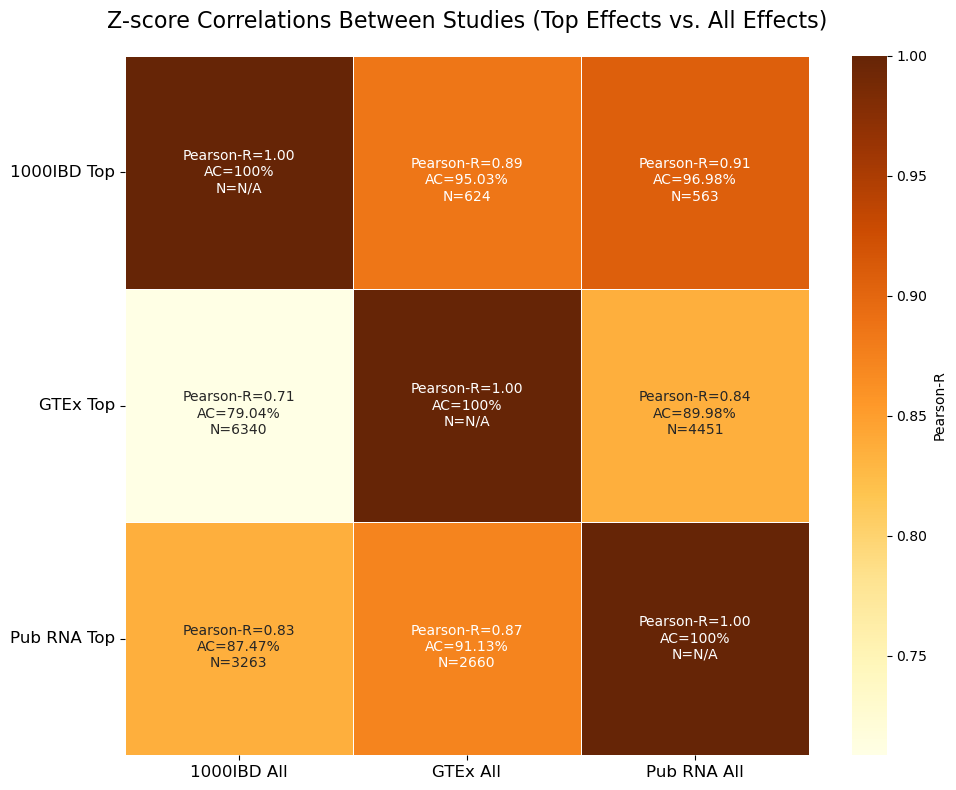

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define each dataframe along with its target matrix position
dataframes_with_positions = [
    ('1000IBD top effects found in GTEx all', werna_gtex, '1000IBD Z value', 'GTEx Z value', (0, 1)),
    ('1000IBD top effects found in Pub RNA all', werna_pub_rna, '1000IBD Z value', 'Pub RNA Z value', (0, 2)),
    ('GTEx top effects found in 1000IBD all', gtex_werna, 'GTEx Z value', '1000IBD Z value', (1, 0)),
    ('GTEx top effects found in Pub RNA all', gtex_pub_rna, 'GTEx Z value', 'Pub RNA Z value', (1, 2)),
    ('Pub RNA top effects found in 1000IBD all', pub_rna_werna, 'Pub RNA Z value', '1000IBD Z value', (2, 0)),
    ('Pub RNA top effects found in GTEx all', pub_rna_gtex, 'Pub RNA Z value', 'GTEx Z value', (2, 1))
]

# Initialize matrices with NaNs
pearson_r_matrix = np.full((3, 3), np.nan)
ac_percentage_matrix = np.full((3, 3), np.nan)
n_matrix = np.full((3, 3), np.nan)
titles_matrix = np.empty((3, 3), dtype=object)

# Set perfect correlations on the diagonal
for i in range(3):
    pearson_r_matrix[i, i] = 1.0
    ac_percentage_matrix[i, i] = 100
    n_matrix[i, i] = np.nan  # N is not applicable for self-comparisons

# Helper function to calculate Allelic Concordance
def calculate_allelic_concordance(x, y):
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx]
    y_valid = y[valid_idx]
    same_direction_count = np.sum(np.sign(x_valid) == np.sign(y_valid))
    total_valid_points = len(x_valid)
    same_direction_percentage = (same_direction_count / total_valid_points * 100) if total_valid_points > 0 else 0
    return same_direction_count, same_direction_percentage, total_valid_points

# Populate the matrices for non-diagonal cells
for name, df, xlabel, ylabel, (row, col) in dataframes_with_positions:
    x = df['MetaPZ']
    y = df['MetaPZ_chrom']

    # Calculate Pearson's r and Allelic Concordance
    pearson_r, _ = pearsonr(x.dropna(), y.dropna())
    ac_count, ac_percentage, n = calculate_allelic_concordance(x, y)

    # Update matrices
    pearson_r_matrix[row, col] = pearson_r
    ac_percentage_matrix[row, col] = ac_percentage
    n_matrix[row, col] = n
    titles_matrix[row, col] = name

# Create annotations for the heatmap cells
annotations = np.empty(pearson_r_matrix.shape, dtype=object)
for i in range(3):
    for j in range(3):
        if i == j:
            # Only show the correlation statistics on diagonal cells without the title
            annotations[i, j] = f'Pearson-R=1.00\nAC=100%\nN=N/A'
        else:
            title = titles_matrix[i, j]
            pearson_r_value = pearson_r_matrix[i, j]
            ac_value = ac_percentage_matrix[i, j]
            n_value = n_matrix[i, j]
            n_display = f'{int(n_value)}' if not np.isnan(n_value) else 'N/A'
            annotations[i, j] = f'\nPearson-R={pearson_r_value:.2f}\nAC={ac_value:.2f}%\nN={n_display}'

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pearson_r_matrix, 
    annot=annotations, 
    fmt='', 
    cmap='YlOrBr', 
    cbar_kws={'label': 'Pearson-R'},
    annot_kws={"size": 10},
    linewidths=0.5, 
    xticklabels=["1000IBD All", "GTEx All", "Pub RNA All"], 
    yticklabels=["1000IBD Top", "GTEx Top", "Pub RNA Top"]
)

# Configure plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.title('Z-score Correlations Between Studies (Top Effects vs. All Effects)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


### Other plots

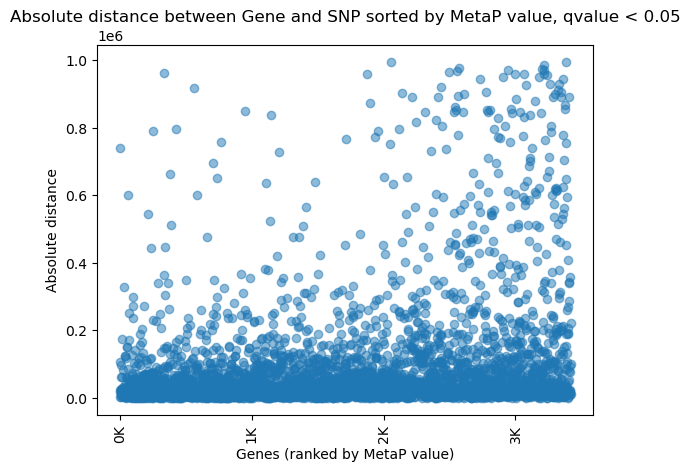

In [18]:
pub_rna_subset = pub_rna_new[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
pub_rna_subset["DistanceAbsolute"] = abs(pub_rna_subset["SNPPos"] - pub_rna_subset["GenePos"])

# Use the index of the genes instead of their names for the x-axis
plt.scatter(pub_rna_subset.index, pub_rna_subset.DistanceAbsolute, alpha=0.5)

# Format the x-axis to display ticks in thousands
def thousands_formatter(x, pos):
    return '%1.0fK' % (x * 1e-3)

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Optionally, set x-axis ticks at intervals of 1000
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1000))

# Set labels and title
plt.xticks(rotation="vertical")
plt.xlabel("Genes (ranked by MetaP value)")
plt.ylabel("Absolute distance")
plt.title("Absolute distance between Gene and SNP sorted by MetaP value, qvalue < 0.05")

# Show the plot
plt.show()


Text(0.5, 1.0, 'Abosulute distance between Gene and SNP, qvalue < 0.05')

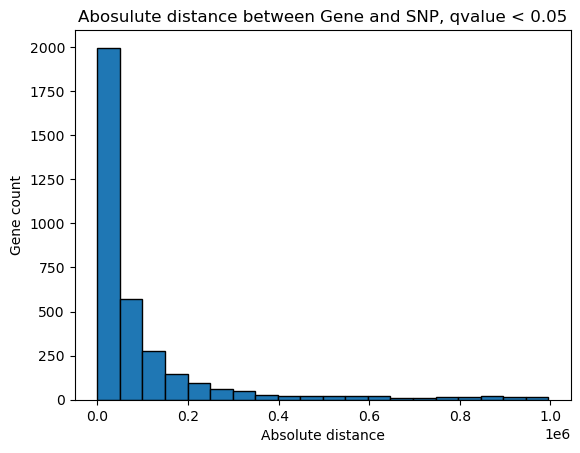

In [19]:
plt.hist(pub_rna_subset["DistanceAbsolute"], bins=20, edgecolor = "black")
plt.xlabel("Absolute distance")
plt.ylabel("Gene count")
plt.title("Abosulute distance between Gene and SNP, qvalue < 0.05")

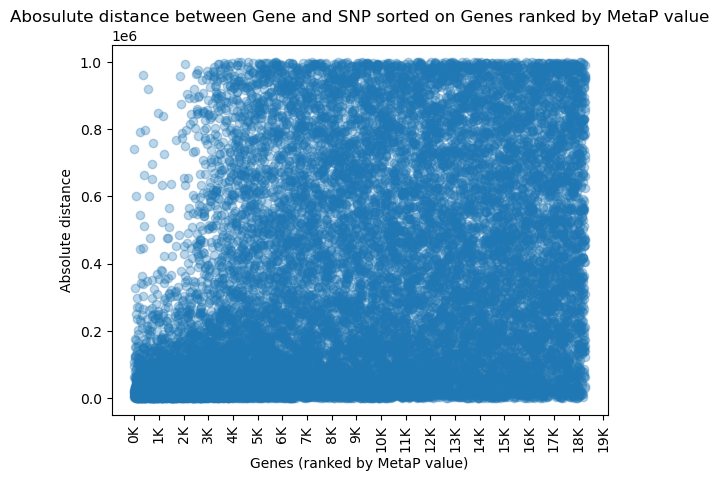

In [19]:
pub_rna_subset_qvalue = pub_rna_new_qvalue[["Gene","MetaP","SNPPos","GenePos"]].sort_values(by="MetaP")
pub_rna_subset_qvalue["DistanceAbsolute"] = abs(pub_rna_subset_qvalue["SNPPos"] - pub_rna_subset_qvalue["GenePos"])

# Use the index of the genes instead of their names for the x-axis
plt.scatter(pub_rna_subset_qvalue.index, pub_rna_subset_qvalue.DistanceAbsolute, alpha=0.3)

# Format the x-axis to display ticks in thousands
def thousands_formatter(x, pos):
    return '%1.0fK' % (x * 1e-3)

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Optionally, set x-axis ticks at intervals of 1000
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1000))

# Set labels and title
plt.xticks(rotation="vertical")
plt.xlabel("Genes (ranked by MetaP value)")
plt.ylabel("Absolute distance")
plt.title("Abosulute distance between Gene and SNP sorted on Genes ranked by MetaP value")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Abosulute distance between Gene and SNP')

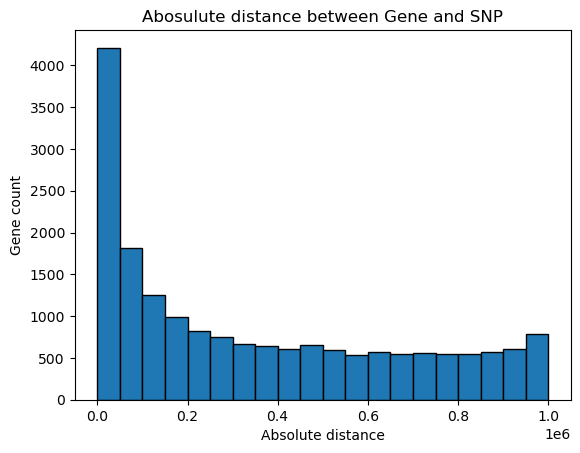

In [18]:
plt.hist(pub_rna_subset_qvalue["DistanceAbsolute"], bins=20, edgecolor = "black")
plt.xlabel("Absolute distance")
plt.ylabel("Gene count")
plt.title("Absolute distance between Gene and SNP")

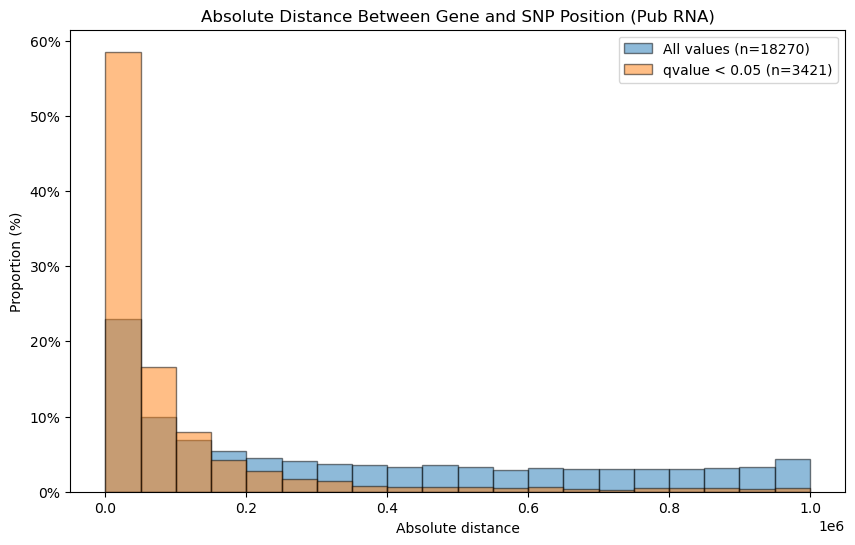

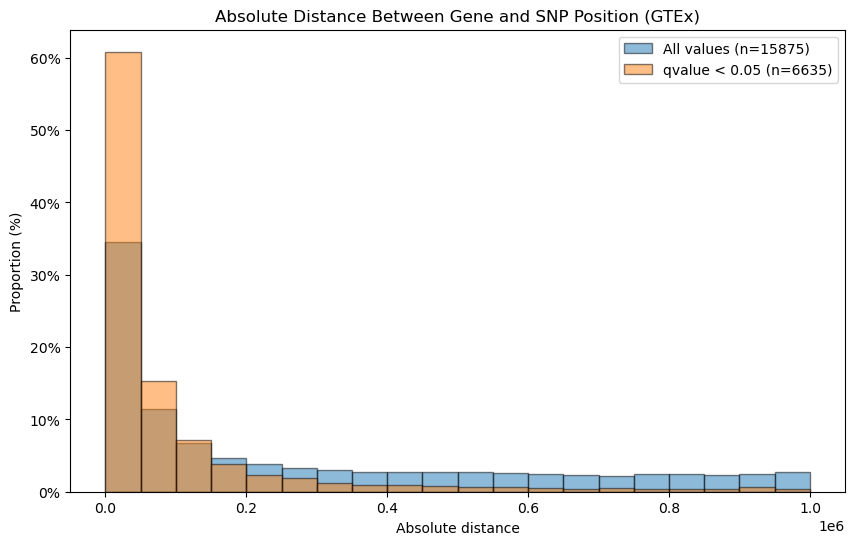

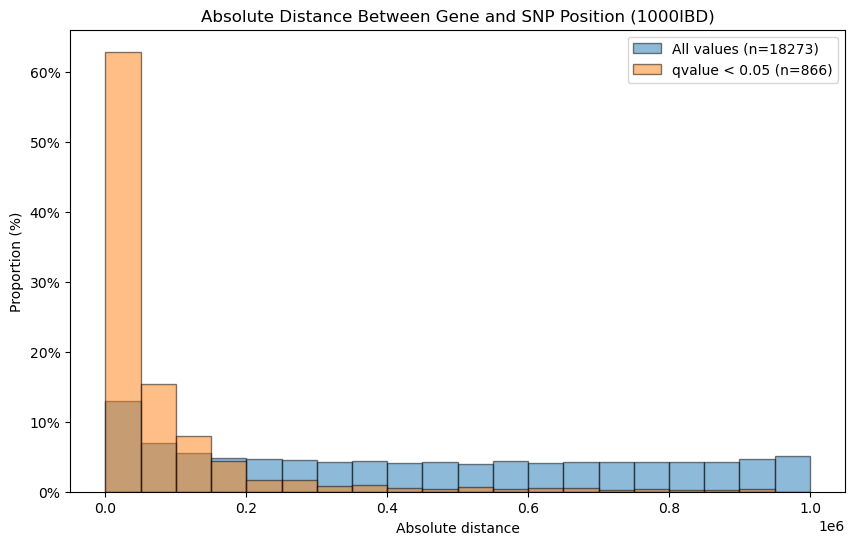

In [21]:
# Dataset 1: pub_rna_subset
pub_rna_subset = pub_rna_new[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
pub_rna_subset["DistanceAbsolute"] = abs(pub_rna_subset["SNPPos"] - pub_rna_subset["GenePos"])
pub_rna_subset_qvalue = pub_rna_new_qvalue[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
pub_rna_subset_qvalue["DistanceAbsolute"] = abs(pub_rna_subset_qvalue["SNPPos"] - pub_rna_subset_qvalue["GenePos"])

# Dataset 2: werna_subset
werna_subset = werna_new[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
werna_subset["DistanceAbsolute"] = abs(werna_subset["SNPPos"] - werna_subset["GenePos"])
werna_subset_qvalue = werna_new_qvalue[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
werna_subset_qvalue["DistanceAbsolute"] = abs(werna_subset_qvalue["SNPPos"] - werna_subset_qvalue["GenePos"])

# Dataset 3: gtex_subset
gtex_subset = gtex_new[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
gtex_subset["DistanceAbsolute"] = abs(gtex_subset["SNPPos"] - gtex_subset["GenePos"])
gtex_subset_qvalue = gtex_new_qvalue[["Gene", "MetaP", "SNPPos", "GenePos"]].sort_values(by="MetaP")
gtex_subset_qvalue["DistanceAbsolute"] = abs(gtex_subset_qvalue["SNPPos"] - gtex_subset_qvalue["GenePos"])

# Find the minimum and maximum distance values across all datasets
min_val = min(gtex_subset["DistanceAbsolute"].min(), werna_subset["DistanceAbsolute"].min(), pub_rna_subset["DistanceAbsolute"].min())
max_val = max(gtex_subset["DistanceAbsolute"].max(), werna_subset["DistanceAbsolute"].max(), pub_rna_subset["DistanceAbsolute"].max())

# Create consistent bin edges for all datasets
bins = np.linspace(min_val, max_val, 21)  # 20 bins, so 21 edges

# Modify the plot_histogram function to use these bin edges
def plot_histogram(dataset_name, subset_all, subset_qvalue):
    total_genes_all = len(subset_all)
    total_genes_qvalue = len(subset_qvalue)

    plt.figure(figsize=(10, 6))
    plt.hist(
        subset_qvalue["DistanceAbsolute"], 
        bins=bins,  # Use predefined bin edges
        weights=np.ones(len(subset_qvalue)) / total_genes_qvalue,  # Normalize to get proportions
        edgecolor="black", 
        alpha=0.5, 
        label=f"All values (n={total_genes_qvalue})"
    )

    plt.hist(
        subset_all["DistanceAbsolute"], 
        bins=bins,  # Use predefined bin edges
        weights=np.ones(len(subset_all)) / total_genes_all,  # Normalize to get proportions
        edgecolor="black", 
        alpha=0.5, 
        label=f"qvalue < 0.05 (n={total_genes_all})"
    )


    # Add labels and title
    plt.xlabel("Absolute distance")
    plt.ylabel("Proportion (%)")
    plt.title(f"Absolute Distance Between Gene and SNP Position ({dataset_name})")

    # Convert y-axis to percentage
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

    # Add a legend to differentiate the two histograms
    plt.legend()

    # Show the plot
    plt.show()

# Plot Datasets
plot_histogram("Pub RNA", pub_rna_subset, pub_rna_subset_qvalue)
plot_histogram("GTEx", gtex_subset, gtex_subset_qvalue)
plot_histogram("1000IBD", werna_subset, werna_subset_qvalue)

### test graphs

Text(0.5, 1.0, 'Histogram of the Allele Frequency (AF), qvalue < 0.05 ,pub rna summary stats')

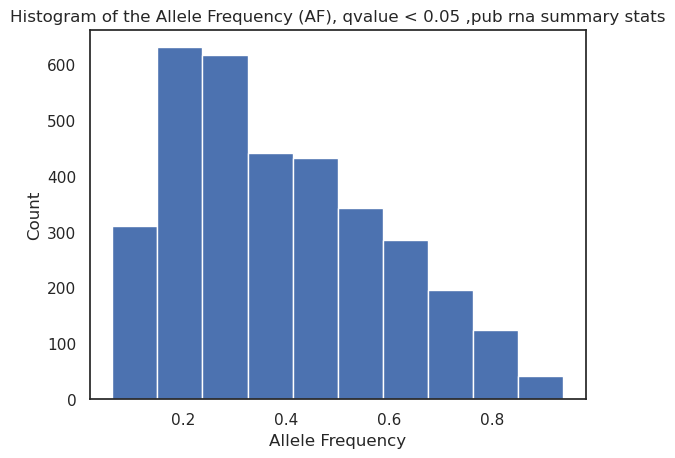

In [63]:
plt.hist(pub_rna_new.SNPEffectAlleleFreq)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Histogram of the Allele Frequency (AF), qvalue < 0.05 ,pub rna summary stats")

Text(0.5, 1.0, 'Histogram of the Allele Frequency (AF), pub rna summary stats')

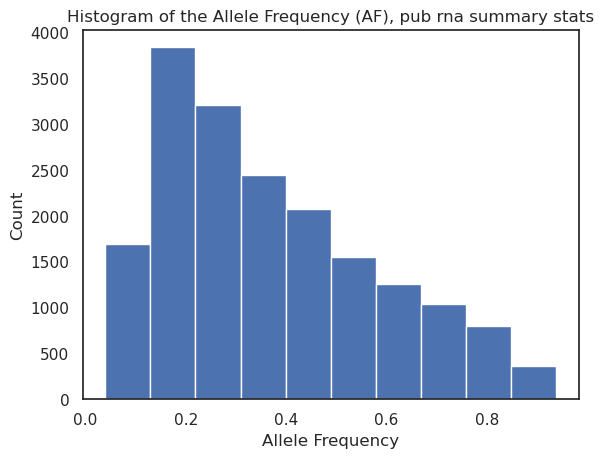

In [62]:
plt.hist(pub_rna_new_qvalue.SNPEffectAlleleFreq)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Histogram of the Allele Frequency (AF), pub rna summary stats")

Text(0.5, 1.0, 'Histogram of the Allele, qvalue < 0.05, if AF > 0.5, 1 - AF')

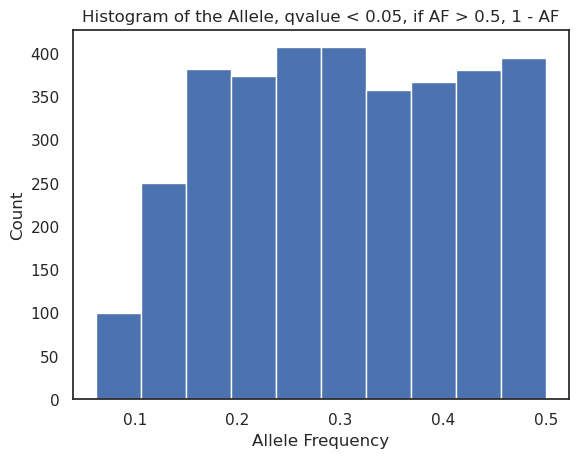

In [52]:
pub_rna_af = pub_rna_new.copy()
pub_rna_af['newAF'] = pub_rna_af['SNPEffectAlleleFreq'].apply(lambda x: 1 - x if x > 0.5 else x)
plt.hist(pub_rna_af.newAF)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Histogram of the Allele, qvalue < 0.05, if AF > 0.5, 1 - AF")

Text(0.5, 1.0, 'Histogram of the Allele, if AF > 0.5, 1 - AF')

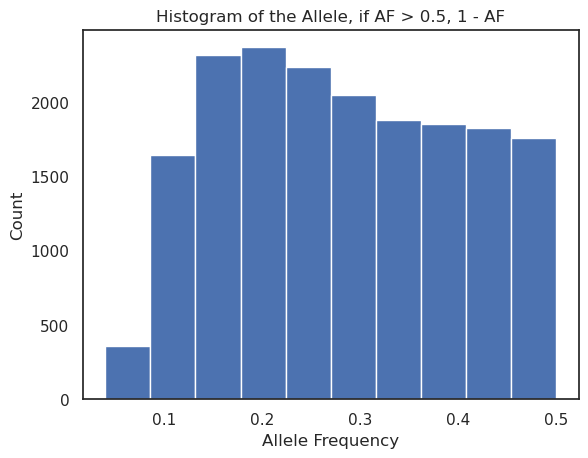

In [54]:
pub_rna_af_qvalue = pub_rna_new_qvalue.copy()
pub_rna_af_qvalue['newAF'] = pub_rna_af_qvalue['SNPEffectAlleleFreq'].apply(lambda x: 1 - x if x > 0.5 else x)
plt.hist(pub_rna_af_qvalue.newAF)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Histogram of the Allele, if AF > 0.5, 1 - AF")

### Heatmap

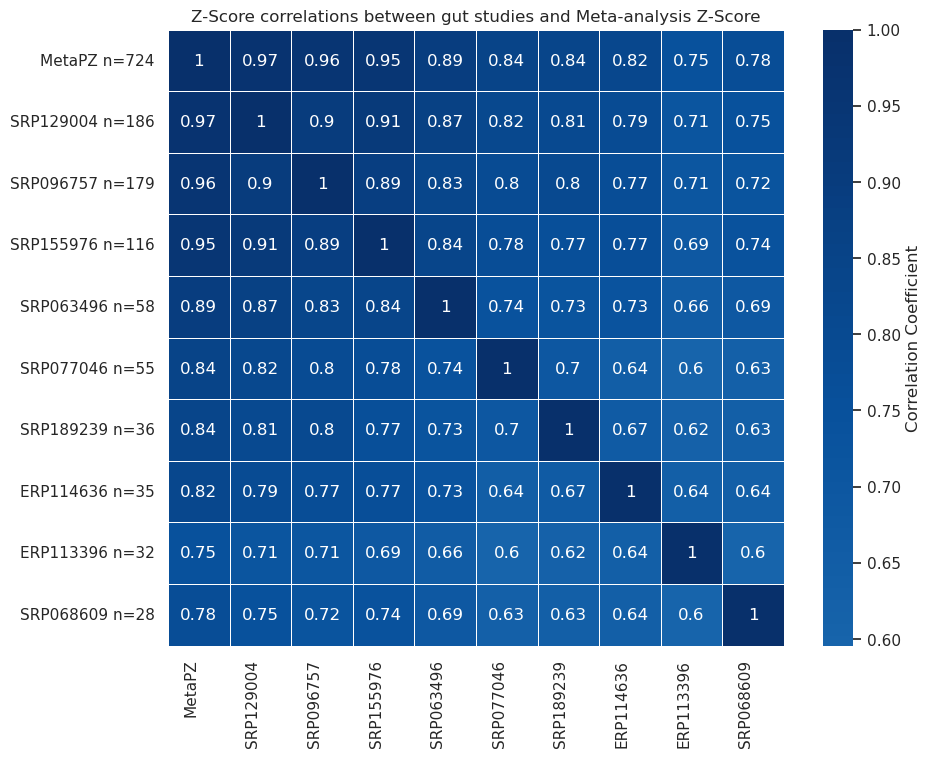

In [24]:
# Define a function to extract dataset size and handle "MetaPZ"
def get_dataset_size(label):
    if label == 'MetaPZ':
        return float('inf')  # Assign a very large value to prioritize it last
    else:
        return int(label.split('n=')[-1])

# Define different labels for x and y axes
x_labels = ['MetaPZ', 'ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']
y_labels = ['MetaPZ n=724', 'ERP113396 n=32', 'ERP114636 n=35', 'SRP063496 n=58', 'SRP068609 n=28', 'SRP077046 n=55',
            'SRP096757 n=179', 'SRP129004 n=186', 'SRP155976 n=116', 'SRP189239 n=36']

# Extract dataset sizes from y_labels
dataset_sizes = [get_dataset_size(label) for label in y_labels]

# Sort x and y labels and sizes together based on dataset size (descending order)
sorted_indices = np.argsort(dataset_sizes)[::-1]  # Descending order
sorted_x_labels = [x_labels[i] for i in sorted_indices]
sorted_y_labels = [y_labels[i] for i in sorted_indices]

# Split the 'DatasetZScores' column into separate columns
dataset_columns = filtered_mbqtl['DatasetZScores'].str.split(';', expand=True)

# Convert dataset columns to numeric values, replace '-' with NaN
dataset_columns = dataset_columns.replace('-', np.nan).apply(pd.to_numeric)

# Concatenate MetaPZ and dataset columns
df = pd.concat([filtered_mbqtl[['MetaPZ']], dataset_columns], axis=1)

# Sort the dataframe columns based on sorted indices
df_sorted = df.iloc[:, sorted_indices]

# Calculate the pairwise correlation matrix
pairwise_corr = df_sorted.corr()

# Plotting the pairwise correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(pairwise_corr, dtype=bool))  # Mask to avoid duplicate plots
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pairwise_corr, annot=True, cmap='Blues', center=0, square=True, linewidths=0.5, 
                      cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Z-Score correlations between gut studies and Meta-analysis Z-Score")

# Set x-axis and y-axis labels
heatmap.set_xticklabels(sorted_x_labels, rotation=90, ha='right')
heatmap.set_yticklabels(sorted_y_labels, rotation=0)

plt.show()

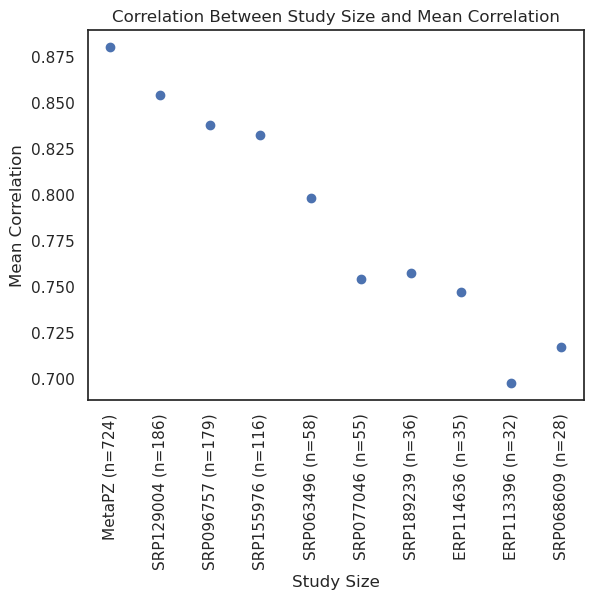

In [25]:
data = {
    "mean_correlation": [0.880516, 0.854018, 0.837940, 0.832740, 0.798118, 0.754275, 0.757460, 0.747086, 0.697556, 0.716877],
    "studies": ["MetaPZ", "SRP129004", "SRP096757", "SRP155976", "SRP063496", "SRP077046", "SRP189239", "ERP114636", "ERP113396", "SRP068609"],
    "size": ["724", "186", "179", "116", "58", "55", "36", "35", "32", "28"]
}

df = pd.DataFrame(data)

# Create a scatter plot with labels
plt.scatter(df['size'], df['mean_correlation'])

# Add labels and title
plt.xlabel('Study Size')
plt.ylabel('Mean Correlation')
plt.title('Correlation Between Study Size and Mean Correlation')

# Custom x-tick labels: "Study Name (n=Size)"
labels = [f"{name} (n={size})" for name, size in zip(df['studies'], df['size'])]
plt.xticks(df['size'], labels, rotation="vertical")  # Rotate labels for readability

# Show the plot
plt.show()

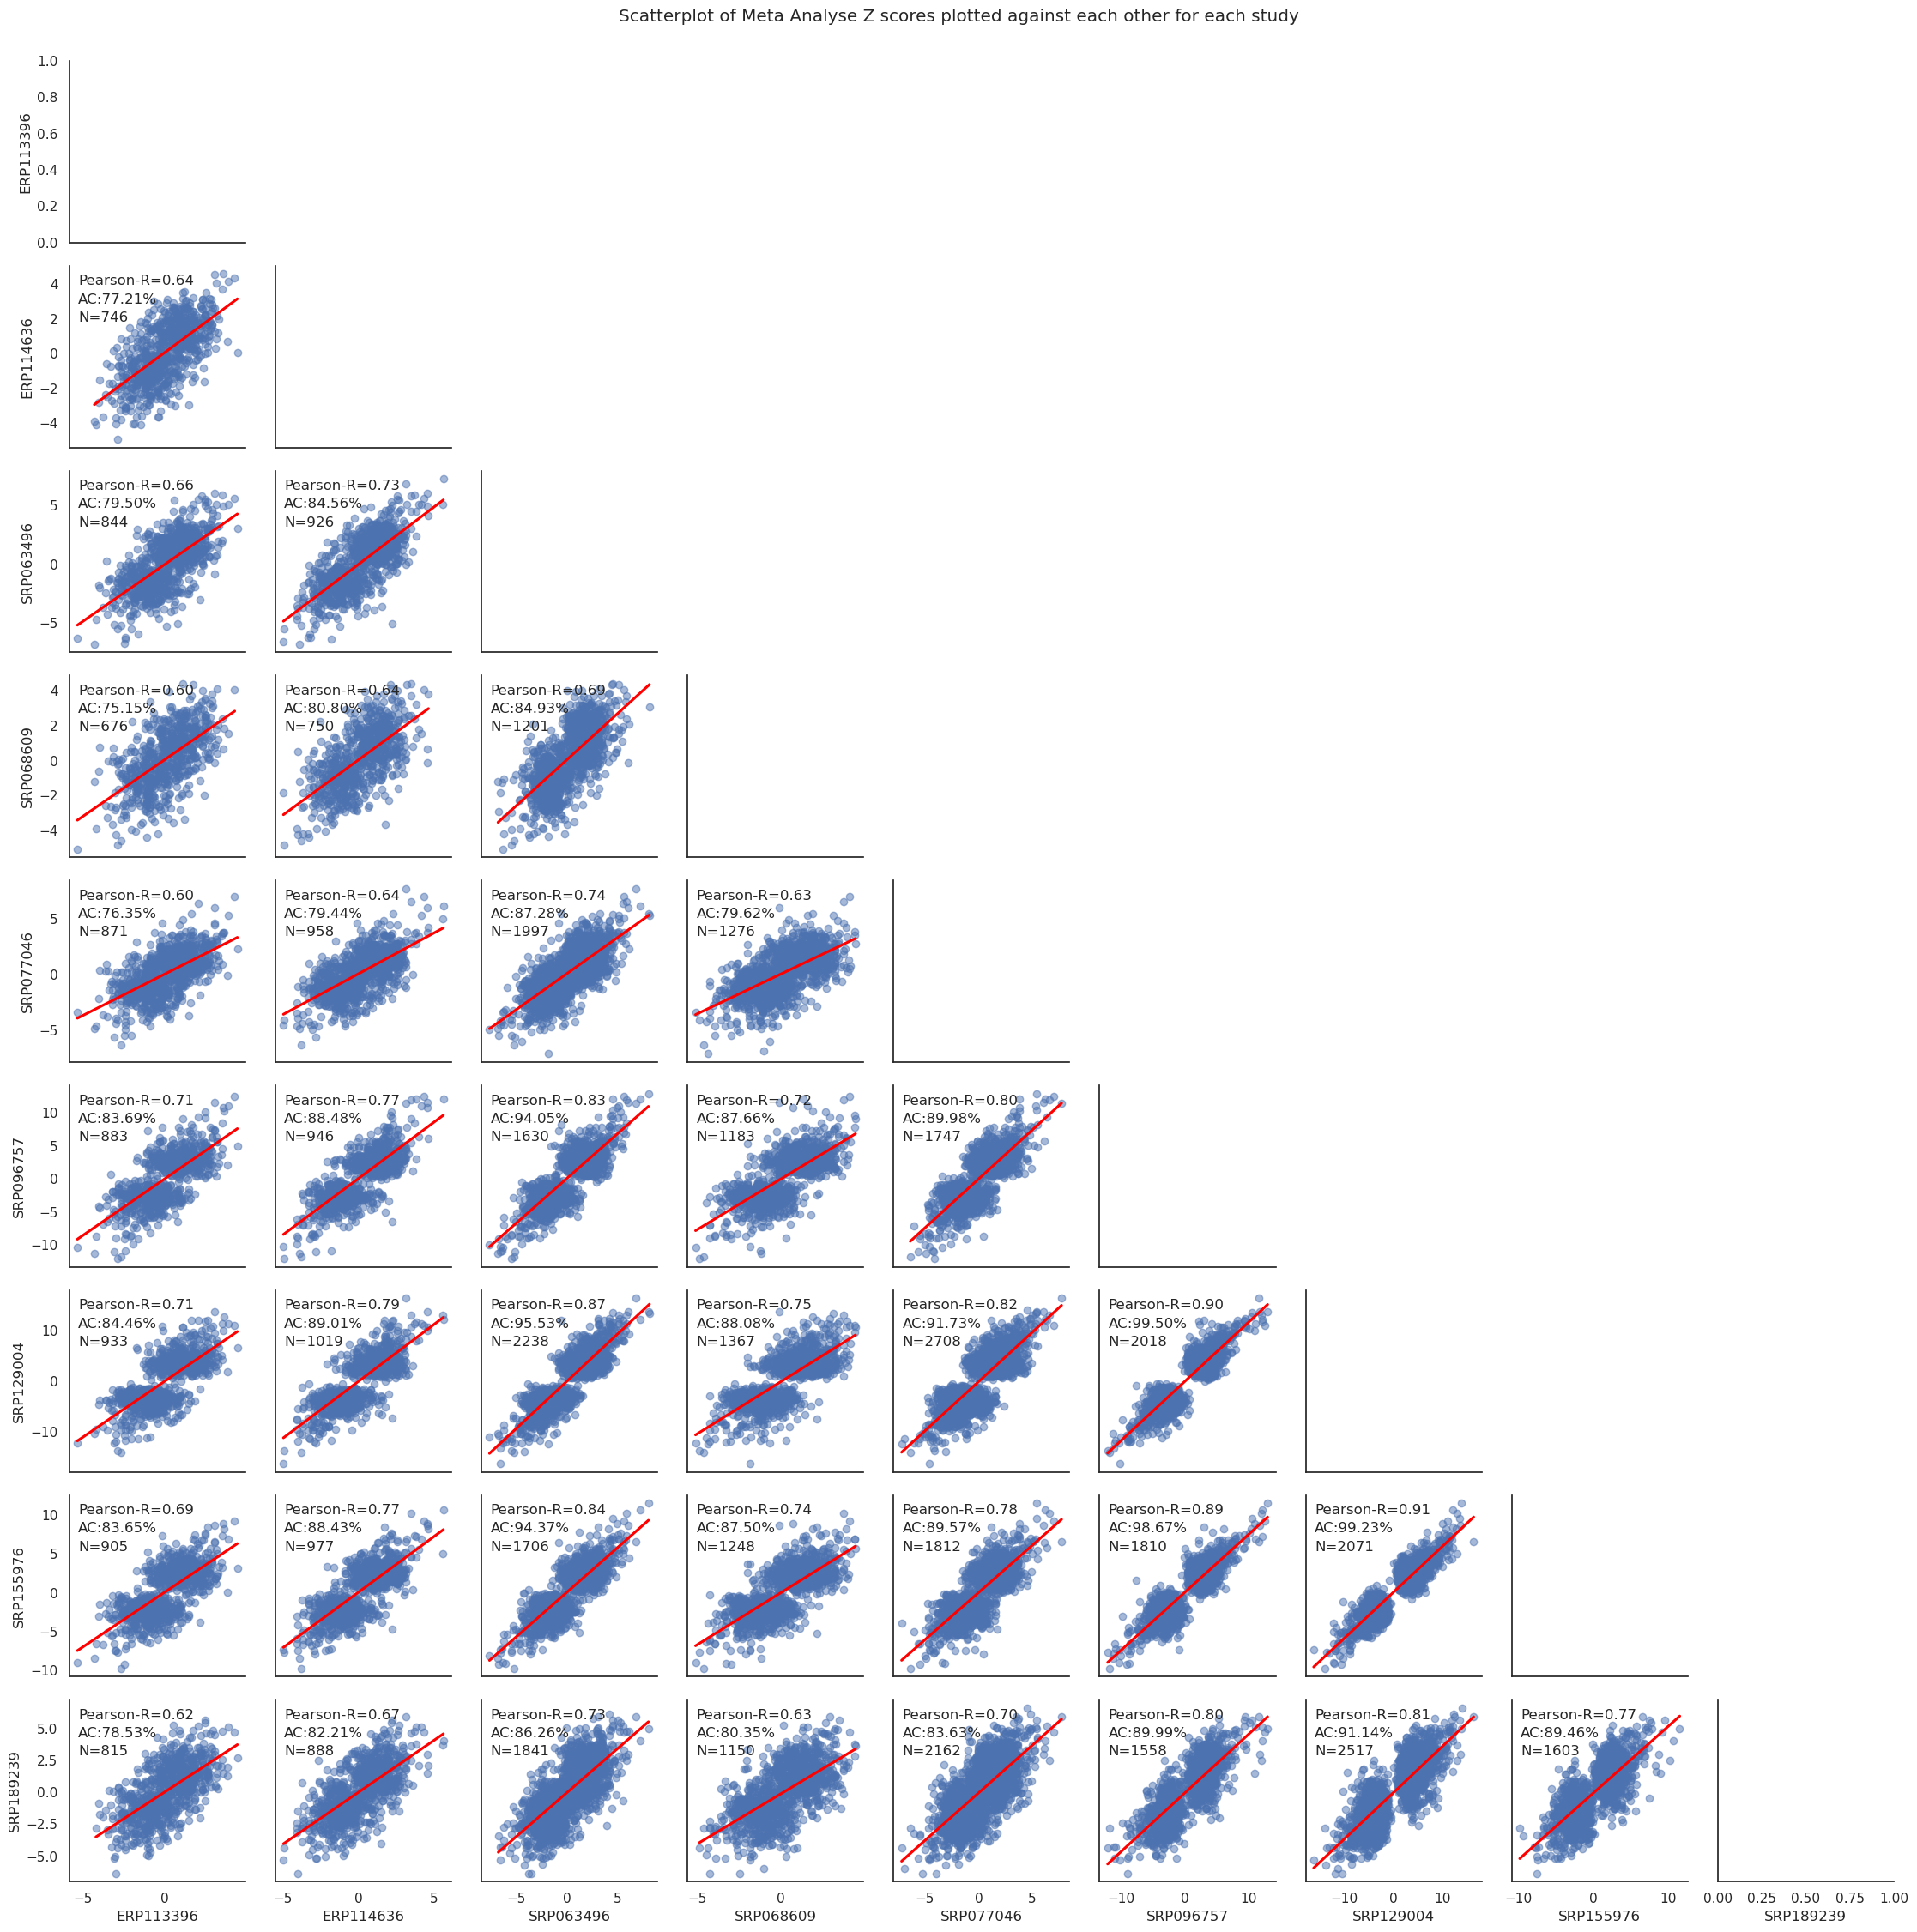

In [26]:
# Create a PairGrid for the scatter plots
g = sns.PairGrid(dataset_columns)

# Define the x_labels and y_labels
labels = ['ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
          'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']

# Function to calculate Allelic Concordance
def calculate_allelic_concordance(x, y):
    # Remove NaN values
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx]
    y_valid = y[valid_idx]

    # Get the count of values that share the same direction
    if len(x_valid) > 1:
        same_direction_count = np.sum(np.sign(x_valid) == np.sign(y_valid))
        same_direction_percentage = (same_direction_count / len(x_valid)) * 100 if len(x_valid) > 0 else 0
        return same_direction_count, same_direction_percentage
    return 0, 0.0

# Function to plot scatter with trendline, N, Pearson-R, and Allelic Concordance
def scatter_with_trendline(x, y, **kwargs):
    # Remove NaN values
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx]
    y_valid = y[valid_idx]

    if len(x_valid) > 1:  # Ensure enough valid points for Pearson-R calculation
        # Scatter plot with trendline
        sns.regplot(x=x_valid, y=y_valid, ci=None, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, **kwargs)

        # Calculate number of data points (N)
        n = len(x_valid)

        # Calculate Pearson-R
        pearson_r, _ = pearsonr(x_valid, y_valid)

        # Calculate Allelic Concordance
        same_direction_count, same_direction_percentage = calculate_allelic_concordance(x_valid, y_valid)

        # Display Pearson-R, N, and Allelic Concordance
        plt.text(0.05, 0.95, f'Pearson-R={pearson_r:.2f}', ha='left', va='top', transform=plt.gca().transAxes)
        plt.text(0.05, 0.85, f'AC:{same_direction_percentage:.2f}%', ha='left', va='top', transform=plt.gca().transAxes)
        # plt.text(0.05, 0.85, f'AC: N={same_direction_count}, {same_direction_percentage:.2f}%', ha='left', va='top', transform=plt.gca().transAxes)
        plt.text(0.05, 0.75, f'N={n}', ha='left', va='top', transform=plt.gca().transAxes)

# Map the lower triangle with scatter plots including trendlines
g.map_lower(scatter_with_trendline)

# Remove upper triangle and diagonal plots by setting their axes to invisible
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Set custom x-axis and y-axis labels
for i, ax in enumerate(g.axes[-1, :]):  # Set the x-axis labels on the bottom
    ax.set_xlabel(labels[i], rotation=0, ha='center')

for i, ax in enumerate(g.axes[:, 0]):  # Set the y-axis labels on the left
    ax.set_ylabel(labels[i], rotation=90, ha='center')

# Adjust the layout and show the plot
g.fig.suptitle("Scatterplot of Meta Analyse Z scores plotted against each other for each study", y=1)
plt.tight_layout()
plt.show()